In [49]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import json
from sklearn.preprocessing import LabelEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [50]:
# The `__init__` method initializes the class attributes to store these datasets (`ds_data` and `field_data`)
# and a merged dataset (`merged_data`) for further analysis.
class CareerTransitionAnalyzer:
    def __init__(self):
        """Initialize the CareerTransitionAnalyzer class"""
        self.ds_data = None
        self.field_data = None
        self.merged_data = None

In [51]:
#Data Loading

def load_data(self, ds_file, field_file):
    """Load both datasets"""
    try:
        self.ds_data = pd.read_csv(ds_file)
        self.field_data = pd.read_csv(field_file)
        print("Successfully loaded datasets:")
        print(f"DS Career dataset shape: {self.ds_data.shape}")
        print(f"Field Occupation dataset shape: {self.field_data.shape}")
        
        # Display sample data
        print("\nDS Career dataset head:")
        display(self.ds_data.head())
        print("\nField Occupation dataset head:")
        display(self.field_data.head())
        return True
    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return False

# Add method to class
CareerTransitionAnalyzer.load_data = load_data

In [52]:
def preprocess_data(self):
    """Preprocess both datasets"""
    try:
        if self.ds_data is None or self.field_data is None:
            raise ValueError("Data not loaded!")

        # Cleaning DS Career dataset
        numeric_cols = ['city_development_index', 'training_hours']
        for col in numeric_cols:
            if col in self.ds_data.columns:
                self.ds_data[col] = self.ds_data[col].fillna(self.ds_data[col].median())

        # Handle experience column
        if 'experience' in self.ds_data.columns:
            self.ds_data['experience'] = self.ds_data['experience'].fillna('0')
            self.ds_data['experience'] = self.ds_data['experience'].replace({'>20': '20', '<1': '0'})
            self.ds_data['experience'] = pd.to_numeric(self.ds_data['experience'], errors='coerce')

        # Cleaning categorical columns
        categorical_cols = ['gender', 'education_level', 'major_discipline']
        for col in categorical_cols:
            if col in self.ds_data.columns:
                self.ds_data[col] = self.ds_data[col].fillna('Unknown')

        print("Data preprocessing completed successfully")
        # Display info about cleaned data
        print("\nDS Career dataset info after preprocessing:")
        display(self.ds_data.info())
        return True
    except Exception as e:
        print(f"Error in preprocessing: {str(e)}")
        return False

# Add method to class
CareerTransitionAnalyzer.preprocess_data = preprocess_data

In [53]:
#Merging datasets by left join
def merge_and_clean_data(self):
    """Merge and clean the datasets"""
    try:
        # Standardize column names
        self.ds_data.columns = self.ds_data.columns.str.lower().str.replace(' ', '_')
        self.field_data.columns = self.field_data.columns.str.lower().str.replace(' ', '_')
        
        # Merge datasets on common columns
        self.merged_data = pd.merge(
            self.ds_data,
            self.field_data,
            on=['education_level', 'gender'],
            how='left',
            suffixes=('_ds', '_field')
        )
        
        print(f"Successfully merged datasets. Shape: {self.merged_data.shape}")
        # Display merged data sample
        print("\nMerged data sample:")
        display(self.merged_data.head())
        return True
    except Exception as e:
        print(f"Error in merging data: {str(e)}")
        return False

# Add method to class
CareerTransitionAnalyzer.merge_and_clean_data = merge_and_clean_data

In [54]:
#Merging dataset by inner join 
def merge_and_clean_data_2(self):
        """Merge and clean the datasets"""
        try:
            # Standardize column names
            self.ds_data.columns = self.ds_data.columns.str.lower().str.replace(' ', '_')
            self.field_data.columns = self.field_data.columns.str.lower().str.replace(' ', '_')

            # Merge datasets
            self.merged_data = pd.merge(
                self.ds_data,
                self.field_data,
                left_on='major_discipline',
                right_on='field_of_study',
                how='inner'
            )

            print(f"Successfully merged datasets. Shape: {self.merged_data.shape}")
            return True
        except Exception as e:
            print(f"Error in merging data: {str(e)}")
            return False
# Add the method to the class
CareerTransitionAnalyzer.merge_and_clean_data_2 = merge_and_clean_data_2


In [55]:
def analyze_top_fields(self):
        """Analyze top fields leading to Data Science"""
        top_fields = self.field_data['field_of_study'].value_counts().head(5)
        top_fields_df = top_fields.reset_index()
        top_fields_df.columns = ['field_of_study', 'count']
        top_fields_df.to_csv('top_fields.csv', index=False)
        print("Saved analysis of top fields to 'top_fields.csv'.")

def analyze_education_transition(self):
        """Analyze education background and career transitions"""
        education_transition = self.ds_data.groupby('education_level')['target'].mean().reset_index()
        education_transition.columns = ['education_level', 'transition_rate']
        education_transition.to_csv('education_transition.csv', index=False)
        print("Saved analysis of education transitions to 'education_transition.csv'.")

def analyze_training_impact(self):
        """Analyze training impact on career progression"""
        training_impact = self.ds_data.groupby('training_hours')['target'].mean().reset_index()
        training_impact.columns = ['training_hours', 'progression_rate']
        training_impact.to_csv('training_impact.csv', index=False)
        print("Saved analysis of training impact to 'training_impact.csv'.")

# Initialize and process
analyzer = CareerTransitionAnalyzer()


In [56]:

#Visualization
def plot_experience_transition(self):
    """Plot experience vs transition rate"""
    plt.figure(figsize=(10, 6))
    
    # Calculate transition rate by experience
    exp_data = self.merged_data.groupby('experience')['target'].agg(['mean', 'count'])
    exp_data['mean'] = exp_data['mean'] * 100
    
    # Create bar plot
    sns.barplot(x=exp_data.index, y=exp_data['mean'])
    plt.title('Career Transition Rate by Years of Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Transition Rate (%)')
    plt.show()

    
def plot_gender_distribution(self):
    """Plot gender distribution in career transitions"""
    plt.figure(figsize=(10, 6))
    
    # Filter the data to only include 'Male' and 'Female' genders
    gender_data = self.merged_data[self.merged_data['gender'].isin(['Male', 'Female'])]
    
    gender_transition = pd.crosstab(
        gender_data['gender'],
        gender_data['target'],
        normalize='index'
    ) * 100
    
    gender_transition.plot(kind='bar')
    plt.title('Career Transition Rate by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage (%)')
    plt.show()


def plot_training_hours(self):
    """Plot training hours distribution"""
    plt.figure(figsize=(10, 6))
    
    sns.boxplot(x='target', y='training_hours', data=self.merged_data)
    plt.title('Training Hours Distribution by Transition Status')
    plt.xlabel('Career Transition (0=No, 1=Yes)')
    plt.ylabel('Training Hours')
    plt.show()

def plot_correlation_heatmap(self):
    """Plot correlation heatmap"""
    plt.figure(figsize=(12, 10))
    
    numeric_cols = self.merged_data.select_dtypes(include=[np.number]).columns
    correlation = self.merged_data[numeric_cols].corr()
    
    # Create a custom colormap with a diverging color scheme
    cmap = sns.diverging_palette(10, 240, as_cmap=True)
    
    # Create the heatmap with a more readable layout
    sns.heatmap(correlation, cmap=cmap, center=0, 
                vmin=-1, vmax=1, square=True, linewidths=1, cbar_kws={'shrink': 0.5},
                annot=False, fmt='.2f')
    
    plt.title('Correlation Heatmap of Numeric Features')
    plt.xticks(rotation=90, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.show()

def plot_education_career_transition(self):
        """Plot the relationship between educational background and career transitions"""
        plt.figure(figsize=(10, 6))

        # Filter out the "Unknown" education level
        education_data = self.merged_data[self.merged_data['education_level'] != 'Unknown']

        # Create a stacked bar chart to show the transition rates by education level
        sns.barplot(x='education_level', y='target', hue='target', data=education_data, dodge=False)
        plt.title('Career Transition Rates by Education Level')
        plt.xlabel('Education Level')
        plt.ylabel('Transition Rate (%)')
        plt.legend(title='Transition', labels=['No Transition', 'Transition'])
        plt.xticks(rotation=90)
        plt.show()

def plot_training_impact_on_progression(self):
    """Plot how relevant skills (based on training) influence career progression"""
    plt.figure(figsize=(10, 6))

    # Create a histogram to show the distribution of training hours by transition status
    sns.histplot(x='training_hours', hue='target', data=self.merged_data, multiple='stack')
    plt.title('Impact of Training Hours on Career Progression')
    plt.xlabel('Training Hours')
    plt.ylabel('Count')
    plt.legend(title='Transition', labels=['No Transition', 'Transition'])
    plt.show()


# Add methods to class
CareerTransitionAnalyzer.plot_experience_transition = plot_experience_transition
CareerTransitionAnalyzer.plot_gender_distribution = plot_gender_distribution
CareerTransitionAnalyzer.plot_training_hours = plot_training_hours
CareerTransitionAnalyzer.plot_correlation_heatmap = plot_correlation_heatmap
CareerTransitionAnalyzer.plot_education_career_transition = plot_education_career_transition
CareerTransitionAnalyzer.plot_training_impact_on_progression = plot_training_impact_on_progression


Successfully loaded datasets:
DS Career dataset shape: (19158, 14)
Field Occupation dataset shape: (38444, 23)

DS Career dataset head:


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0



Field Occupation dataset head:


,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


Data preprocessing completed successfully

DS Career dataset info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  int64  
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  targ

None

Successfully merged datasets. Shape: (7019573, 35)

Merged data sample:


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,...,skills_gap,family_influence,mentorship_available,certifications,freelancing_experience,geographic_mobility,professional_networks,career_change_events,technology_adoption,likely_to_change_occupation
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11561,city_21,0.624,Unknown,No relevent experience,Full time course,Graduate,STEM,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33241,city_115,0.789,Unknown,No relevent experience,NaN,Graduate,Business Degree,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20,50-99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Generating visualizations...


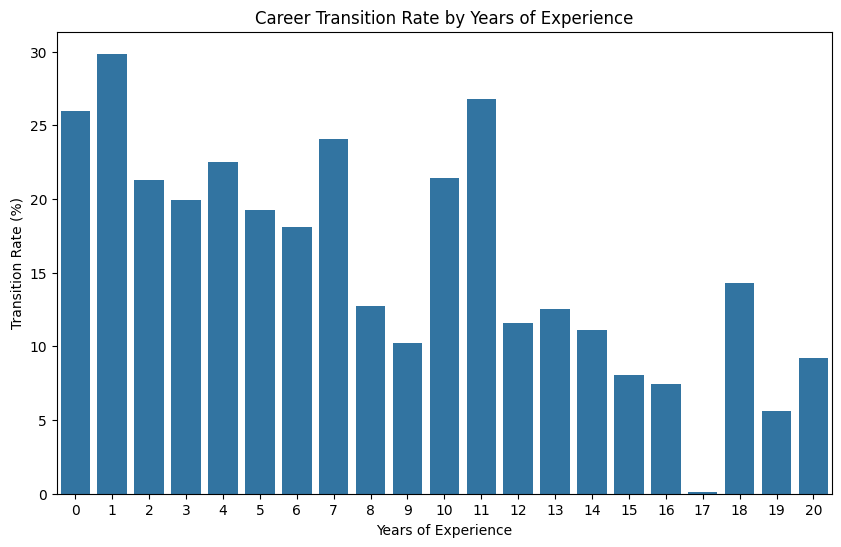

<Figure size 1000x600 with 0 Axes>

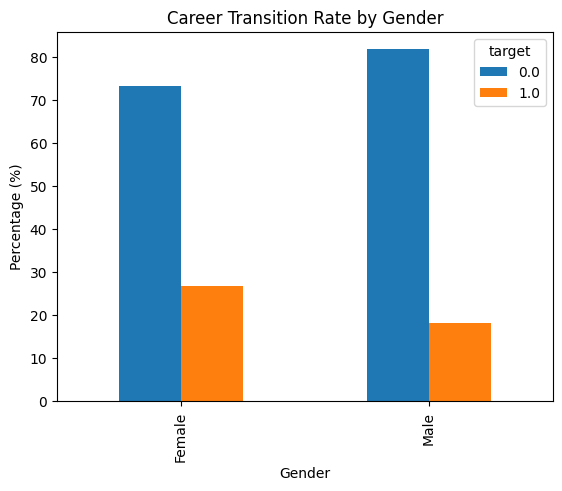

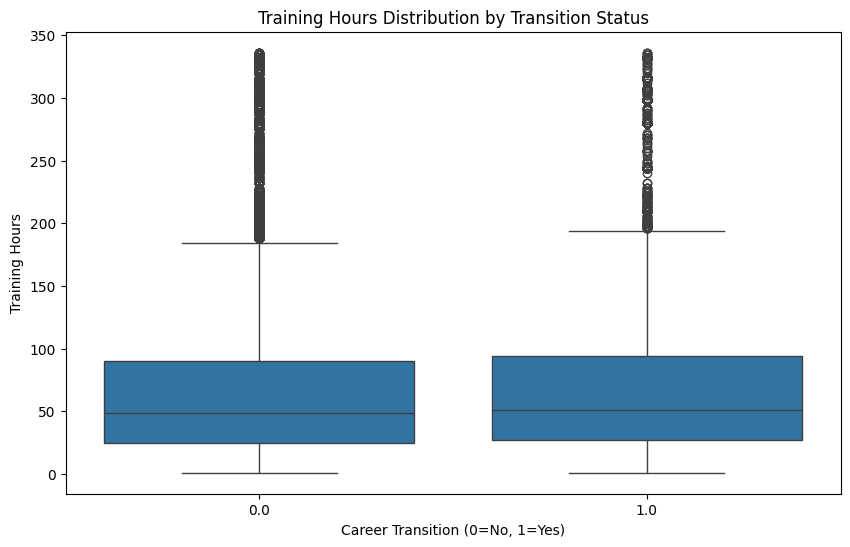

MemoryError: Unable to allocate 1018. MiB for an array with shape (19, 7019573) and data type float64

<Figure size 1200x1000 with 0 Axes>

In [57]:
# Initialize analyzer
analyzer = CareerTransitionAnalyzer()


# Define file paths
DS_CAREER_PATH = r"C:\Users\s29sh\OneDrive\Documents\Sem3_2024\Scripting\MiniProject\aug_train.csv"
FIELD_OCCUPATION_PATH = r"C:\Users\s29sh\OneDrive\Documents\Sem3_2024\Scripting\MiniProject\field_vs_occupation.csv"

# Load and process data
if analyzer.load_data(DS_CAREER_PATH, FIELD_OCCUPATION_PATH):
    if analyzer.preprocess_data():
        if analyzer.merge_and_clean_data():
            # Create visualizations
            print("\nGenerating visualizations...")
            analyzer.plot_experience_transition()
            analyzer.plot_gender_distribution()
            analyzer.plot_training_hours()
            analyzer.plot_correlation_heatmap()
            analyzer.plot_education_career_transition()
            analyzer.plot_training_impact_on_progression()
            print("\nAnalysis complete.")